### Score: `[26]`

Q1. `[10]` Good job!

Q2. `[8+8]` 缺少要素

各题批注用`### Note`给出，请自行查阅。

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.ticker import ScalarFormatter

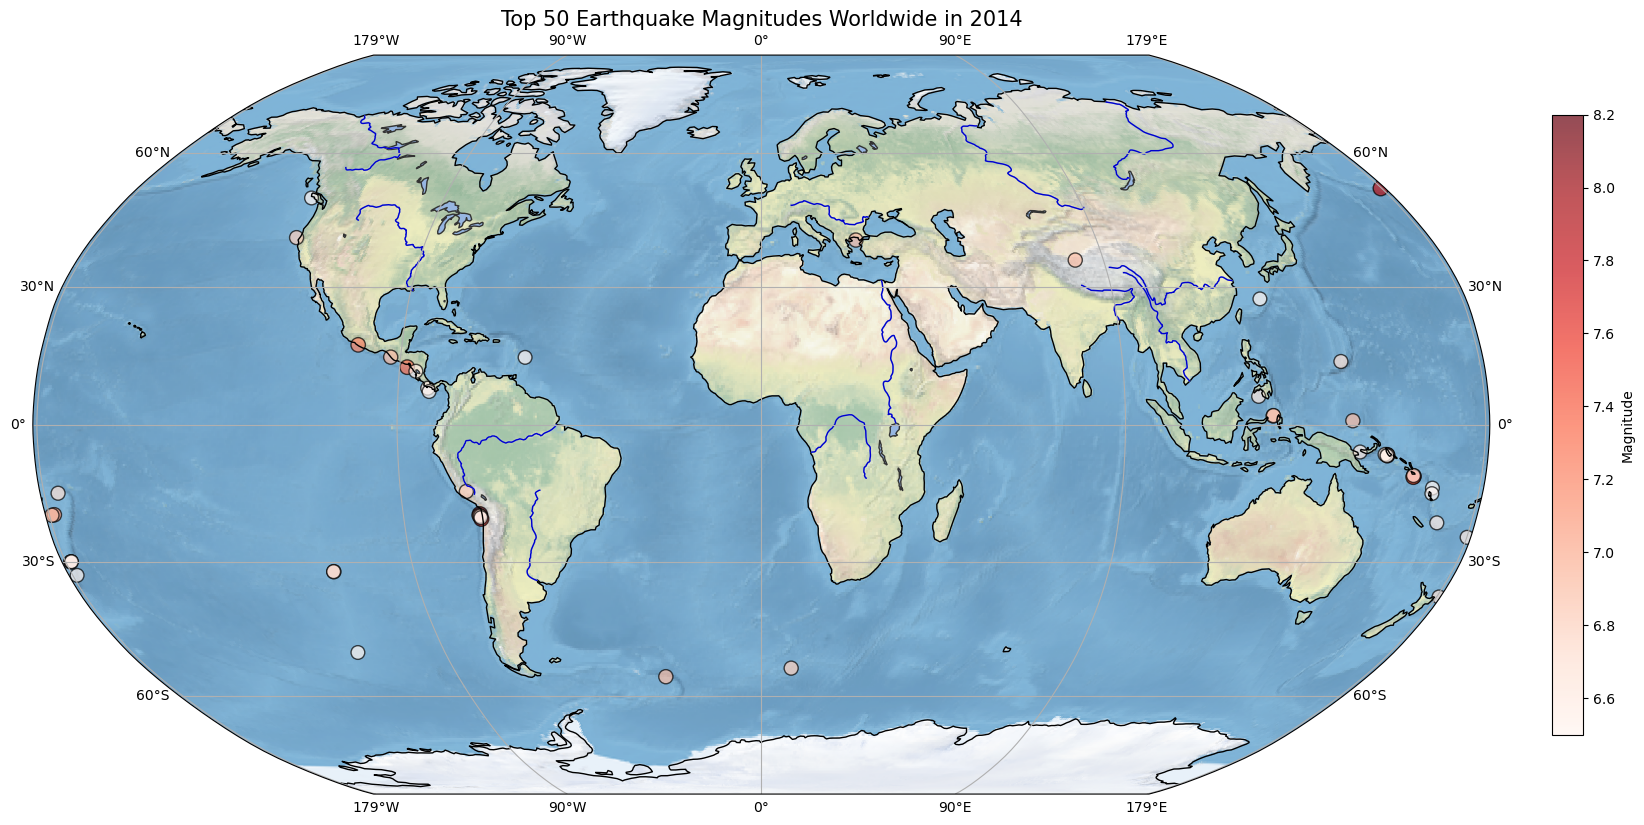

In [2]:
#2014年top50
# 读取 USGS 地震数据文件
earthquake_data = pd.read_csv('usgs_earthquakes.csv')

# 将日期转换为 datetime 格式
earthquake_data['time'] = pd.to_datetime(earthquake_data['time'])

# 筛选出 2014 年的数据
earthquake_2014 = earthquake_data[earthquake_data['time'].dt.year == 2014]

# 按震级排序并选取前 50 个地震
top_50_earthquakes = earthquake_2014.nlargest(50, 'mag')

# 设置一个画板，将其返还给fig
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson()) ### Note: 地图的中心经度可以在这里设置
ax.coastlines()

# 添加地图特征
ax.stock_img()  # 添加地球背景图像
ax.add_feature(cfeature.OCEAN)  # 添加海洋
ax.add_feature(cfeature.LAND, edgecolor='#444444')  # 添加陆地，边缘为黑色
ax.add_feature(cfeature.LAKES, edgecolor='#333333')  # 添加湖泊，边缘为黑色
ax.add_feature(cfeature.RIVERS)  # 添加河流

# 添加自然地理特征中的河流（110m 分辨率）
rivers_110m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '110m')
ax.add_feature(rivers_110m, facecolor='None', edgecolor='#0000CD')  # 河流线条为蓝色

# 绘制地震点，根据震级调整标记的大小和颜色
sizes = top_50_earthquakes['mag'] * 15  # 震级 * 15 来设置标记的大小
sizes = np.maximum(sizes, 10)  # 确保标记大小不为0

# 绘制散点图，震级决定点的颜色与大小，添加黑色边缘
scatter = ax.scatter(top_50_earthquakes['longitude'], top_50_earthquakes['latitude'], 
                     c=top_50_earthquakes['mag'], cmap='Reds',  # 使用白到红渐变色
                     s=sizes, alpha=0.7, transform=ccrs.PlateCarree(),
                     edgecolors='black',  # 添加黑色边缘
                     linewidth=1)  # 设置边缘宽度为1

# 添加色条，表示震级
cbar = plt.colorbar(scatter, ax=ax, label='Magnitude', fraction=0.02, pad=0.04)

# 添加标题和标签
ax.set_title('Top 50 Earthquake Magnitudes Worldwide in 2014', fontsize=15)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# 添加网格线，并指定 x 轴上的标签位置
ax.gridlines(draw_labels=True, xlocs=[-179, -90, 0, 90, 179])  # 添加网格线，指定标签位置

# 显示地图
plt.show()

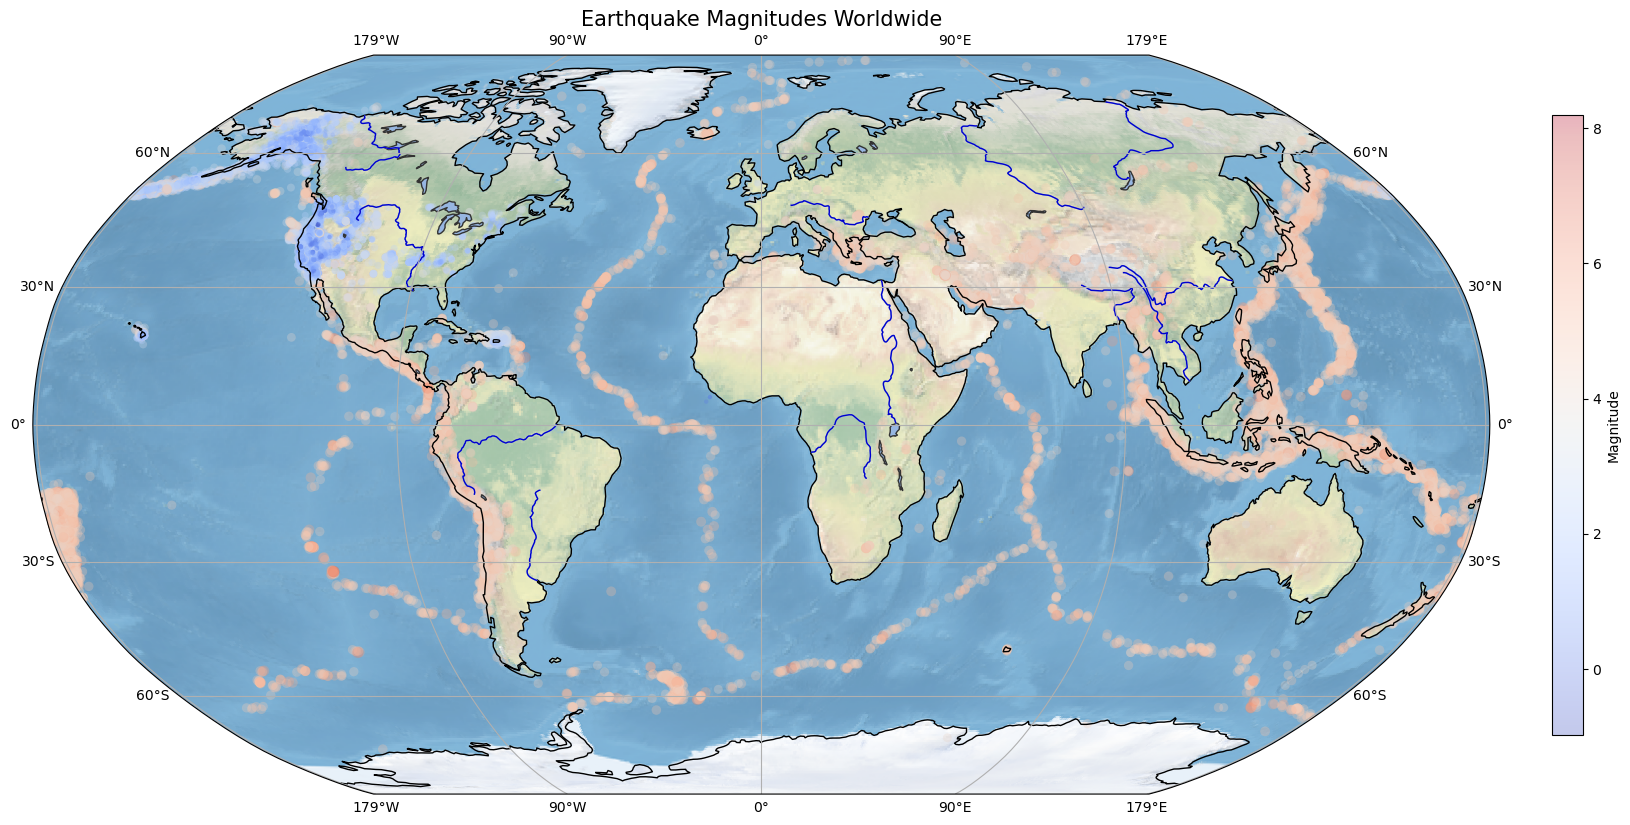

In [3]:
#  全部地震图
# 读取 USGS 地震数据文件
earthquake_data = pd.read_csv('usgs_earthquakes.csv')

#设置一个画板，将其返还给fig
fig=plt.figure(figsize=(20,15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.coastlines()

# 添加地图特征
ax.stock_img()# 添加地球背景图像
ax.add_feature(cfeature.OCEAN)  # 添加海洋
ax.add_feature(cfeature.LAND, edgecolor='#444444')  # 添加陆地，边缘为黑色
ax.add_feature(cfeature.LAKES, edgecolor='#333333')  # 添加湖泊，边缘为黑色
ax.add_feature(cfeature.RIVERS)  # 添加河流

# 添加自然地理特征中的河流（110m 分辨率）
rivers_110m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '110m')
ax.add_feature(rivers_110m, facecolor='None', edgecolor='#0000CD')  # 河流线条为蓝色

# 绘制地震点，根据震级调整标记的大小和颜色
sizes = earthquake_data['mag'] * 10  # 震级 * 10 来设置标记的大小
sizes = np.maximum(sizes, 10)  # 确保标记大小不为0

# 绘制散点图，震级决定点的颜色与大小
scatter = ax.scatter(earthquake_data['longitude'], earthquake_data['latitude'], 
                     c=earthquake_data['mag'], cmap='coolwarm',  # 使用红蓝渐变色
                     s=sizes, alpha=0.3, transform=ccrs.PlateCarree(),
                     edgecolor='none',  # 移除散点的边缘
                     linewidth=0)  # 确保没有边缘宽度

# 添加色条，表示震级
cbar = plt.colorbar(scatter, ax=ax, label='Magnitude', fraction=0.02, pad=0.04)

# 添加标题和标签
ax.set_title('Earthquake Magnitudes Worldwide', fontsize=15)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# 添加网格线，并指定 x 轴上的标签位置
ax.gridlines(draw_labels=True, xlocs=[-179, -90, 0, 90, 179])  # 添加网格线，指定标签位置

# 显示地图
plt.show()



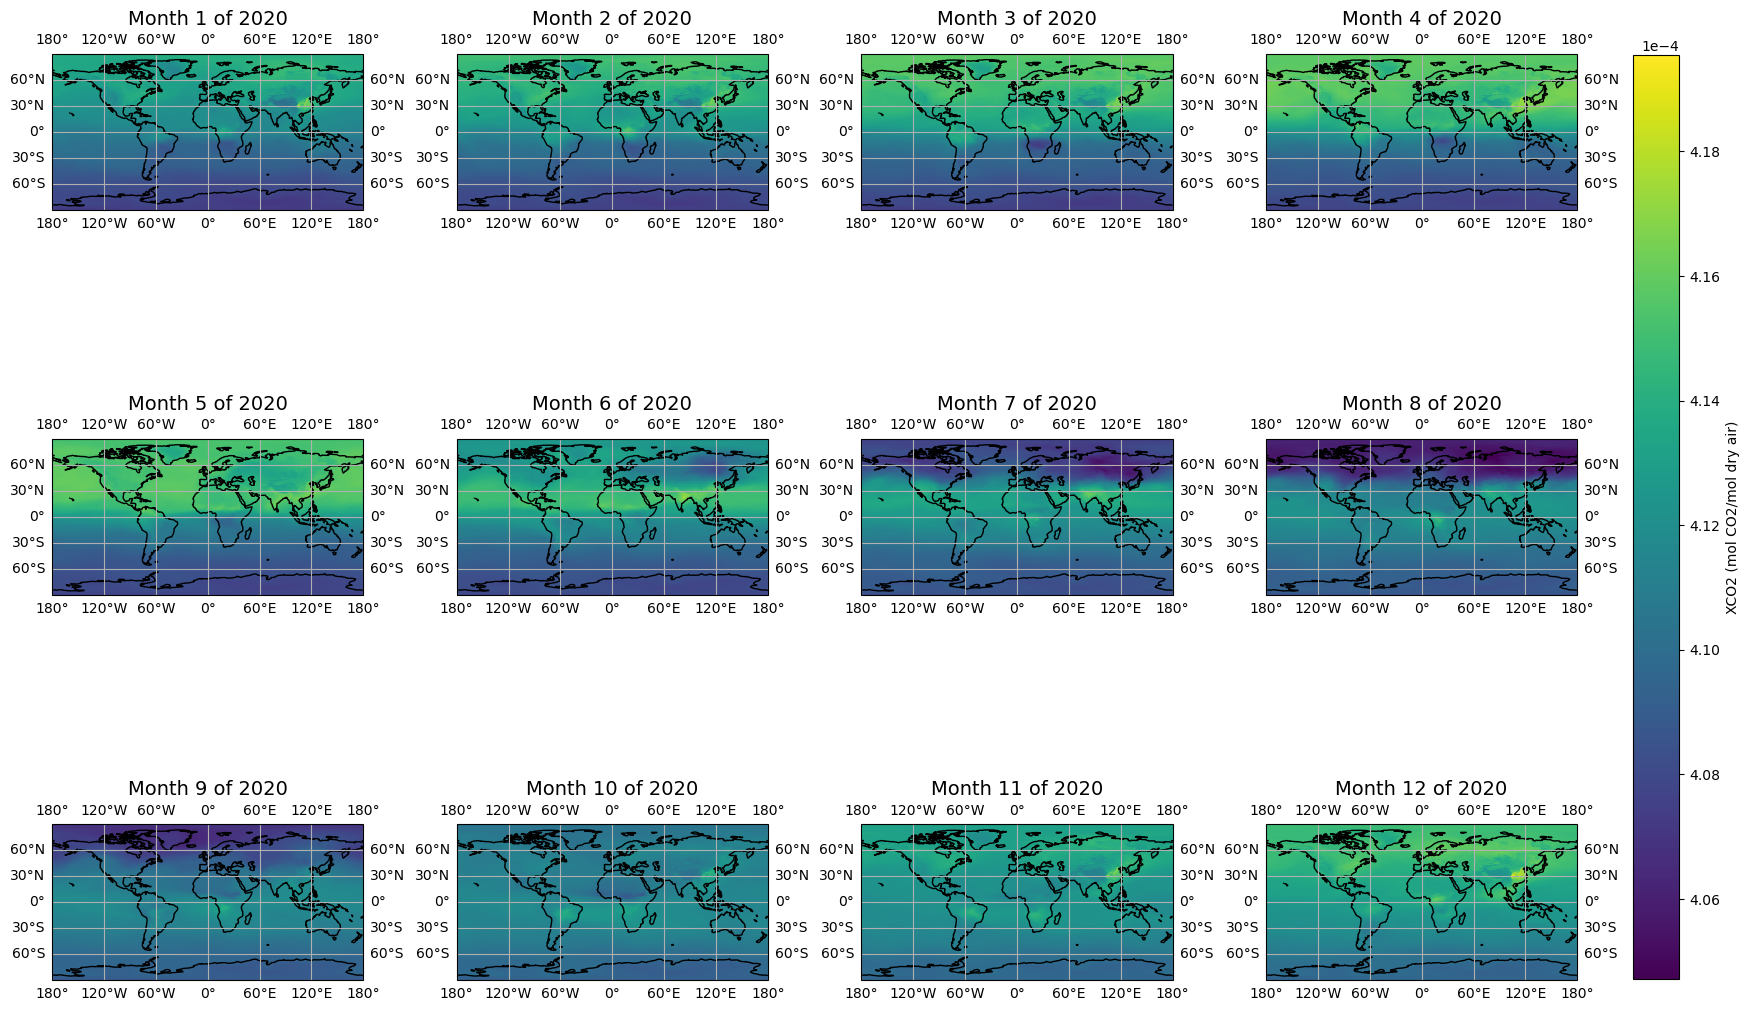

In [4]:
#2.1
# 读取数据
file_path = 'oumerged_output.nc4'  
dataset = xr.open_dataset(file_path)

# 选择变量，例如 'XCO2'
xco2 = dataset['XCO2']

# 获取时间维度
time_dim = xco2.time

# 选择2020年12个月的数据
time_2020 = time_dim.sel(time='2020')  # 选择2020年的数据
xco2_2020 = xco2.sel(time=time_2020)  # 获取2020年的XCO2数据

# 创建图形并关闭 constrained_layout
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(24, 15), subplot_kw={'projection': ccrs.PlateCarree()})

# 使用 subplots_adjust 来手动调整子图之间的间距
plt.subplots_adjust(hspace=0.001, wspace=0.3)

# 设置全局的最小值和最大值（确保色条范围一致）
vmin = xco2_2020.min().values
vmax = xco2_2020.max().values

# 遍历2020年的每个月，并绘制每个月的图
for i, ax in enumerate(axes.flat):
    # 获取第i个月的数据
    month_data = xco2_2020.isel(time=i)  # 选择第i个月的数据
    
    # 绘制该月的数据
    im = ax.pcolormesh(month_data.lon, month_data.lat, month_data.values, cmap='viridis', transform=ccrs.PlateCarree(),
                       vmin=vmin, vmax=vmax)

    # 添加地图特征
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
    ax.add_feature(cfeature.COASTLINE, linewidth=1)

    # 设置标题和标签
    ax.set_title(f'Month {i + 1} of 2020', fontsize=14)
    ax.set_xlabel('Longitude', fontsize=10)
    ax.set_ylabel('Latitude', fontsize=10)
    ax.gridlines(draw_labels=True)

# 创建一个共享的色条
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), orientation='vertical', pad=0.03, shrink=0.8)
cbar.set_label('XCO2 (mol CO2/mol dry air)')
cbar.formatter = ScalarFormatter()
cbar.formatter.set_powerlimits((-3, 4))  # 设置为科学计数法
cbar.update_ticks()  # 更新色条的刻度

# 显示图形
plt.show()

### Note: 缺少x轴和y轴经纬度标题，也没有text box，下一题同理

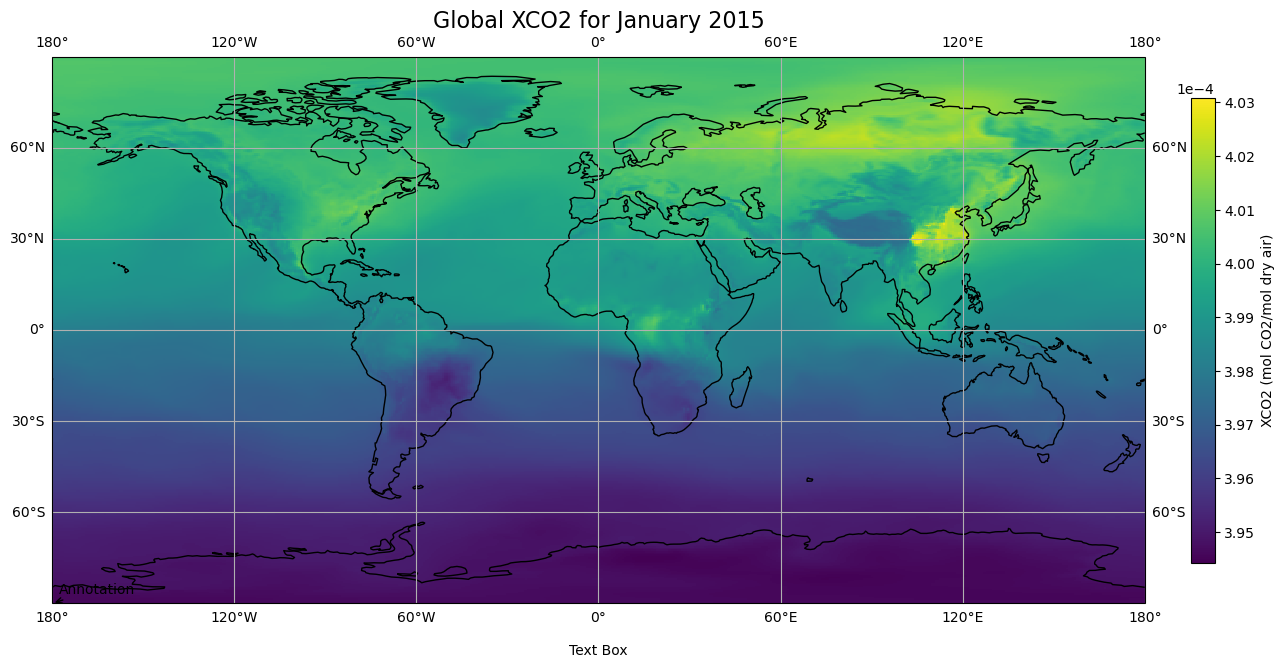

In [5]:
#2.1
# 读取数据
file_path = 'oumerged_output.nc4'
dataset = xr.open_dataset(file_path)

# 选择变量，例如 'XCO2PREC'
xco2 = dataset['XCO2'].isel(time=0)  # 选择第一个时间步

# 创建掩码（假设海洋上的值为 NaN）
mask = xco2.isnull()

# 使用 numpy 的 masked_where 创建一个掩码数组
masked_data = np.ma.masked_where(mask, xco2)

# 创建全球地图
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# 绘制图像，使用掩码数据
im = ax.pcolormesh(xco2.lon, xco2.lat, masked_data, cmap='viridis', transform=ccrs.PlateCarree())

# 添加地图特征：海洋、陆地、海岸线等
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')  # 海洋为浅蓝色
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')  # 陆地为灰色
ax.add_feature(cfeature.COASTLINE, linewidth=1)

# 添加标题
ax.set_title('Global XCO2 for January 2015', fontsize=16)

# 添加 x 和 y 标签及刻度线
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.gridlines(draw_labels=True)  # 显示网格线

# 添加色条
cbar = plt.colorbar(im, ax=ax, orientation='vertical', label='XCO2 (mol CO2/mol dry air)', fraction=0.02, pad=0.04)
cbar.formatter.set_powerlimits((-3, 4))  # 设置为科学计数法

# 添加注释和文本框
ax.annotate('Annotation', xy=(0, 0), xytext=(5, 5),
            xycoords='axes fraction', textcoords='offset points',
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            horizontalalignment='left', verticalalignment='bottom')

ax.text(0.5, -0.1, 'Text Box', horizontalalignment='center', 
        verticalalignment='bottom', transform=ax.transAxes)

# 显示图形
plt.show()

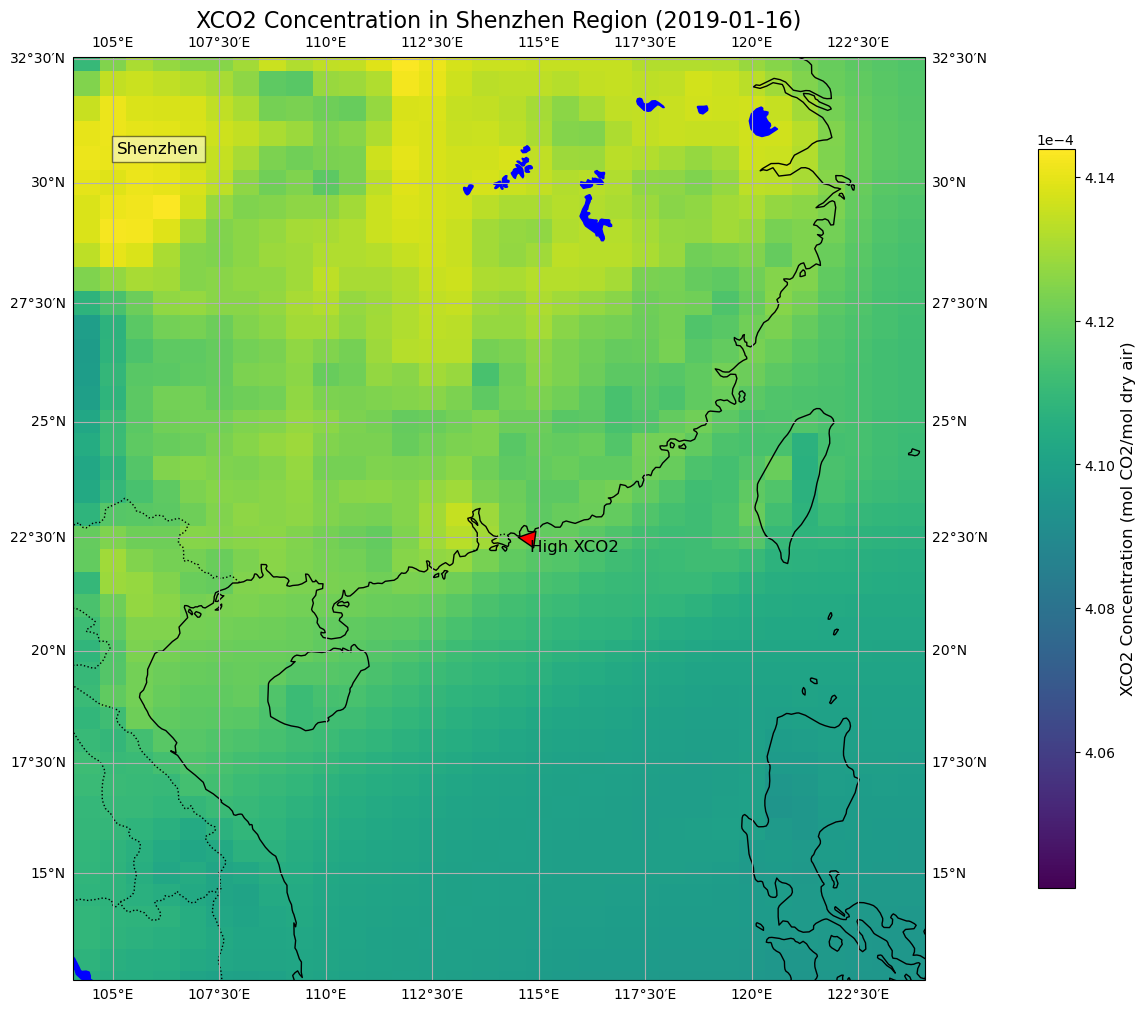

In [6]:
#2.2
# 读取数据
file_path = 'oumerged_output.nc4' 
dataset = xr.open_dataset(file_path)

# 选择变量，例如 'XCO2'
xco2 = dataset['XCO2']

# 创建图形并定义大小和分辨率
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.Mercator()}, constrained_layout=True)

# 设置一个区域，假设我们绘制某一特定区域（例如深圳周围区域）
central_lon, central_lat = 114.06, 22.54  # 深圳经纬度
extent = [central_lon - 10, central_lon + 10, central_lat - 10, central_lat + 10]
ax.set_extent(extent)

# 绘制该区域的 XCO2 数据
vmin = xco2.sel(time='2019-01-16').min().values
vmax = xco2.sel(time='2019-01-16').max().values
xco2.sel(time='2019-01-16').plot(ax=ax, transform=ccrs.PlateCarree(),
                                  vmin=vmin, vmax=vmax, cmap='viridis', add_colorbar=False)

# 添加地理特征（海洋、陆地、湖泊等）
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='blue')
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# 添加网格线和标签
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# 添加标题
ax.set_title('XCO2 Concentration in Shenzhen Region (2019-01-16)', fontsize=16)

# 创建色条并使用科学计数法格式化色条数值
cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical', shrink=0.8)
cbar.set_label('XCO2 Concentration (mol CO2/mol dry air)', fontsize=12)

# 设置色条数值为科学计数法
cbar.formatter = ScalarFormatter()
cbar.formatter.set_powerlimits((-3, 4))  # 设置为科学计数法的范围
cbar.update_ticks()  # 更新色条刻度

# 添加注释和文本框
ax.text(0.1, 0.9, 'Shenzhen', horizontalalignment='center', verticalalignment='center',
        transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# 注释高浓度区域
ax.annotate('High XCO2', xy=(114.5, 22.5), xytext=(114.8, 22.2),
            arrowprops=dict(facecolor='red', shrink=0.05),
            transform=ccrs.PlateCarree(), fontsize=12)

# 显示图形
plt.show()